## Importing Necessary Libraries

In [77]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from IPython.display import Image

### Reading the cleaned data set

In [78]:
df =pd.read_csv('C:\Users\Mike\Desktop\SpringBoard\Projects\Capstone Project_1\Proposals\Cervical Cancer Risk Factors\Cervical_Cancer_Risk_Cleaned.csv')

In [79]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0


**Dropping unnamed column**

In [80]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

### Spliting the data in two parts (train and test), fitting Logreg model and applying accuracy test

In [81]:
# Split the data into a training and test set.
X = df.drop('Dx:Cancer', axis =1).values
y = df['Dx:Cancer'].values
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, train_size = 0.75, random_state=10, stratify = y)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(Xlr), ylr)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.995
Test data set accuracy score   : 0.986


**Data imbalance occurs when the sample size in the data classes are unevenly distributed as such in our data set. Most standard machine learning algorithms work well with balanced training data but they face challenges when the dataset classes are imbalanced. In such situation, classification methods tend to be biased towards the majority class. These algorithms are inefficient in this case mainly because they seek to maximize a measure of performance such as accuracy which is no longer a proper measure for imbalanced data. Accuracy treats equally the correctly and incorrectly classified examples of different data classes. For example, consider a data set that has 10% positive class and 90% negative class. A naif classifier that always outputs the majority class label will have a high accuracy of around 0.90. As the data imbalance is more pronounced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class.**

### Default Logistic Regression Train Classification Report

In [82]:
print(classification_report(ylr, clf.predict(Xlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       630
          1       1.00      0.77      0.87        13

avg / total       1.00      1.00      1.00       643



**The train classification report shows that, our model predicted the non-cancer patients correctly with 100% accuracy. But 10 out of 13 patients are predicted correctly as cancer with %77 accuracy which means that model missed 3 patients.**

### Default Logistic Regression Test Classification Report

In [83]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       210
          1       1.00      0.40      0.57         5

avg / total       0.99      0.99      0.98       215



**The test classification report shows that our model predicted the non-cancer patients correctly with %99 accuracy. But only 2 out of 5 patients were predicted correctly as cancer and missed 3 patients. We will apply Logistic Regression 5-Fold Cross Validation to get more stable accuracy.** 

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

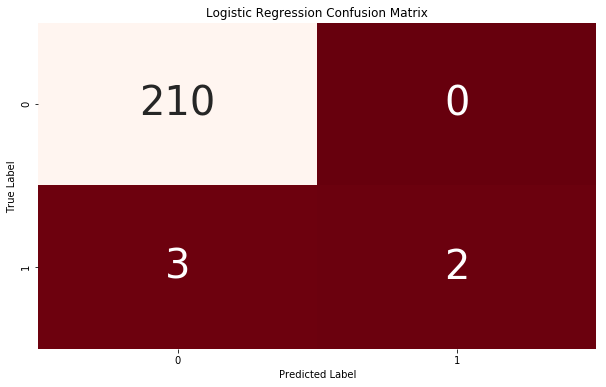

In [84]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

### Logistic Regression with 5-Fold Cross-Validation

In [85]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    scores = []
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 10 times
        clf.fit(x[train], y[train]) # fit
        score = score_func(clf.predict(x[test]), y[test])
        scores.append(score)
        result += score # evaluate score function on held-out data
    return result / nfold, scores # average and the list of the scores

In [86]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

(0.98603439922480618, [1.0, 0.96899224806201545, 0.96899224806201545, 0.9921875, 1.0])


### Logistic Regression with 5-Fold Cross-Validation Test Classification Report

In [87]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       210
          1       1.00      0.40      0.57         5

avg / total       0.99      0.99      0.98       215



**Logistic Regression with 5-Fold Cross-validation did not effect the prediction accuracy of the model.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

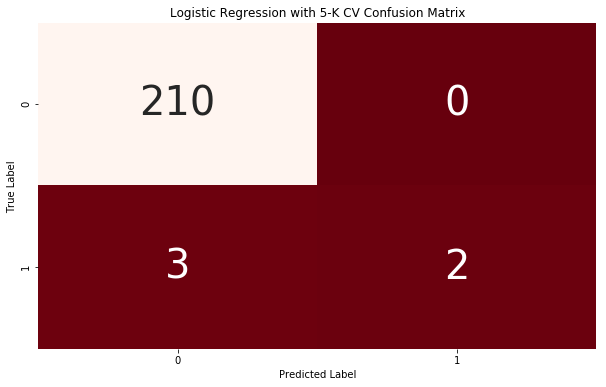

In [88]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression with 5-K CV Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

## Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L1 Penalty

In [89]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(random_state = 42), 
                   param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1']}, cv=5)
clf = clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.986046511628


### Best Estimator of Hyper Parameter Optimization with L1 Penalty. 

In [90]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**According to the best_estimator results, C=1 is the best regularization parameter.**

### For each parameter values, accuracy scores and the standard deviations.

In [91]:
results = clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

({'penalty': 'l1', 'C': 0.001}, 0.9798, 0.0037)
({'penalty': 'l1', 'C': 0.01}, 0.9798, 0.0037)
({'penalty': 'l1', 'C': 0.1}, 0.9798, 0.0037)
({'penalty': 'l1', 'C': 1}, 0.9922, 0.007)
({'penalty': 'l1', 'C': 10}, 0.9922, 0.007)
({'penalty': 'l1', 'C': 100}, 0.9922, 0.007)


**The accuracy score is 0.992 and the standard deviation is 0.007.**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L1 Penalty Train Classification Report

In [92]:
print(classification_report(ylr, clf.predict(Xlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       630
          1       0.92      0.85      0.88        13

avg / total       1.00      1.00      1.00       643



**With Lasso Regression, we reached up to 0.85 recall score which means that in the train set our model could predict 11 out of 13 Cancer patients accurately.**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L1 Penalty Test Classification Report

In [93]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       210
          1       0.75      0.60      0.67         5

avg / total       0.98      0.99      0.99       215



**Despite recall score increased up to 0.6, our model missed 2 patients out of 5 as Cancer.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

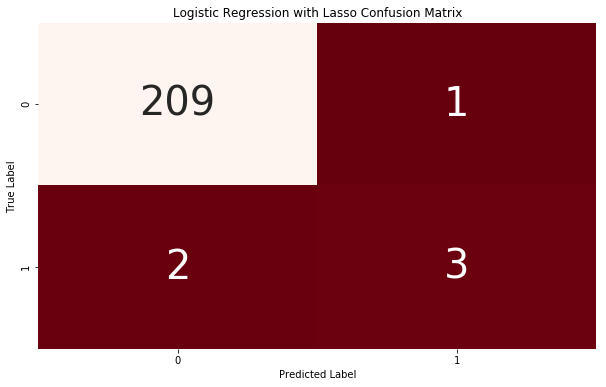

In [94]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression with Lasso Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

## Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L2 Penalty

In [95]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}, cv=5)
clf = clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.990697674419


### Best Estimator of Hyper Parameter Optimization with L2 Penalty.

In [96]:
clf.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**According to the best_estimator results, C=100 is the best regularization parameter.**

### For each parameter values, accuracy scores and the standard deviations.

In [97]:
results = clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

({'penalty': 'l2', 'C': 0.001}, 0.9798, 0.0037)
({'penalty': 'l2', 'C': 0.01}, 0.9798, 0.0037)
({'penalty': 'l2', 'C': 0.1}, 0.9782, 0.0031)
({'penalty': 'l2', 'C': 1}, 0.986, 0.0058)
({'penalty': 'l2', 'C': 10}, 0.9907, 0.0076)
({'penalty': 'l2', 'C': 100}, 0.9922, 0.0069)


**The accuracy score is 0.992 and the standard deviation is 0.069.** 

**Despite the accuracy scores of L1 and L2 are the same, our model would choose L2 (Ridge regression) since the standard deviation of L2 is less than L1.**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L2 Penalty Train Classification Report

In [98]:
print(classification_report(ylr, clf.predict(Xlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       630
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00       643



**With Ridge regression, Grid Seach CV Hyper Parameter Optimization increased the model accuracy up to %100 in the train set.**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L2 Penalty Test Classification Report

In [99]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       210
          1       1.00      0.60      0.75         5

avg / total       0.99      0.99      0.99       215



**But we can not say the same thing for the test set. We still have 0.6 recall accuracy. By the way after applying the hyper parameter optimization with Lasso and Ridge regression, despite recall values did not change, precision incresed with Ridge which means Ridge outperformed Lasso in this case.** 

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

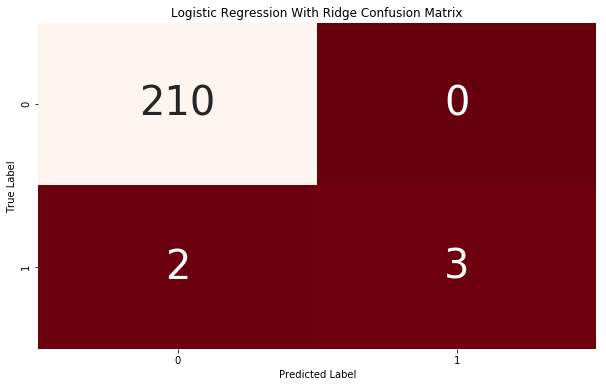

In [100]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression With Ridge Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

## Random Forest Classifier

**In order to increase the prediction accuracy of the model, we applied Random Forest Classifier.**

In [101]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=400)
clf.fit(Xlr, ylr)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1'], digits = 3))

             precision    recall  f1-score   support

          0      0.986     1.000     0.993       210
          1      1.000     0.400     0.571         5

avg / total      0.986     0.986     0.983       215



**Confusion Matrix**

Text(0.5,33,'Predicted Label')

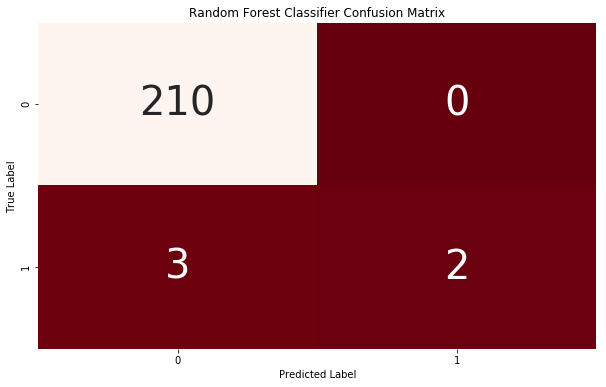

In [102]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

**After applying Random Forest classifier, Our model came back to the default Logistic Regression scores which means our model still predicts Cancer patients with %40 accuracy. In order to increase prediction accuracy we will apply SMOTE to increase Cancer samples in our train set and after fitting our model to train set, we will get the correct prediction proportion of test set.**

## Synthetic Minority Oversampling Technique (SMOTE)

The former approach re-balances the class distribution by either oversampling the minority class or undersampling the majority class or by combing the two. The later approach seeks to learn more from the minority class by setting a high cost to the misclassification of this class. 

In [103]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xlr, ylr)
print('Resampled dataset shape {}'.format(Counter(y_res)))
print (X_res.shape)
print (y_res.shape)

Resampled dataset shape Counter({0: 630, 1: 630})
(1260L, 63L)
(1260L,)


**This is the new feature matrix which has 1260 data points and 63 features as X_res and the new response vector which has 1260 data points and 1 feature as y_res.**

### SMOTE with Logistic Regression

In [104]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
# Print the accuracy from the training and testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(X_res), y_res)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.999
Test data set accuracy score   : 0.991


**After implementing SMOTE, we got the test classification report**

### SMOTE with Logistic Regression Test Classification Report

In [105]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1'], digits =3))

             precision    recall  f1-score   support

          0      0.995     0.995     0.995       210
          1      0.800     0.800     0.800         5

avg / total      0.991     0.991     0.991       215



**After implementing SMOTE, test set classification report is obtained as written above. Now our model predicted Cancer patients with %80 accuracy which means that SMOTE increased our models correct prediction ability almost double.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

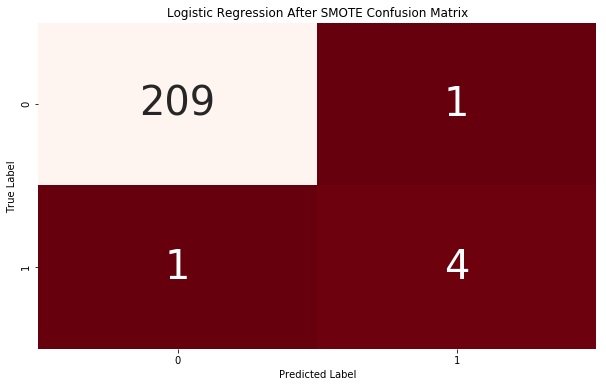

In [106]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression After SMOTE Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

### Now we will apply Random Forest Classifier after SMOTE

## SMOTE with Random Forest Classifier

In [107]:
clf = RandomForestClassifier(n_estimators=400)
clf.fit(X_res, y_res)
predictions = clf.predict( Xtestlr)

### SMOTE with Random Forest Classifier Test Classification Report

In [108]:
print (classification_report(ytestlr, predictions, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       210
          1       1.00      0.80      0.89         5

avg / total       1.00      1.00      1.00       215



**Applying Random Forest Classifier with SMOTE did not change the recall score.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

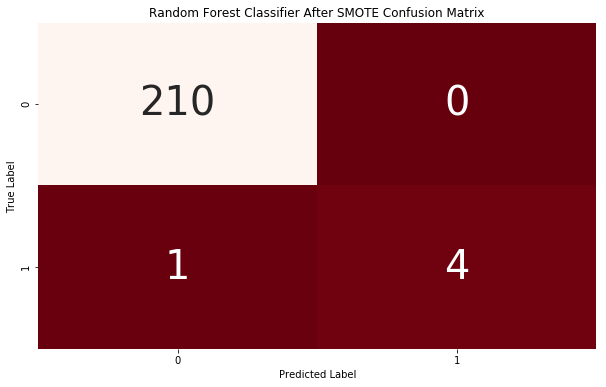

In [109]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Random Forest Classifier After SMOTE Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

## Results of the Models/Applications (Proportion 0.75/0.25)

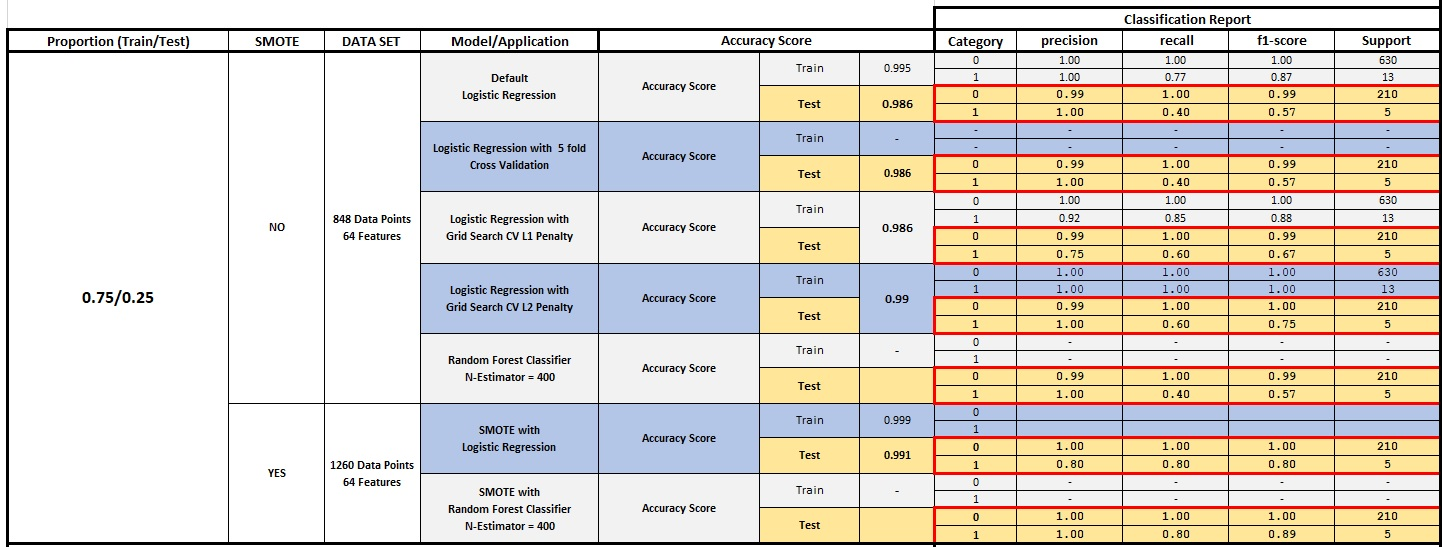

In [110]:
img = 'Report_1.jpg'
Image(filename=img)

**1. Cervical Cancer Risk Data set is pretty imbalanced since Dx:Cancer(response vector) consists of 1 and 0 which has a  18/840 proportion. After splitting out the data set two parts with the .25/.75 proportion and applying Logistic Regression model. We found out that our model was predicting Nan-cancer patients with %99 accuracy which was expected. But for the cancer patients, model could not get the same accuracy results and 2 patients out of 5 patients were correctly predicted as cancer but 3 patients were missed (0.4). As seen, there were only 5 cancer patients in the test set which did not allow the model to predict more accurate.**

**2. After applying the Logistic Regression with 5-Fold Cross Validation, we got 0.986 accuracy score. However there was no improvement of the proper prediction of the Cancer Patient.**

**3. Then we applied Hyper Parameter optimization to the model with Grid Search CV both L1 and L2 (default) penalties. After applying L1 GridSearch CV optimization, the accuracy score did not change but prediction of Cancer patients increased up to %60 which means 3 out of 5 patients were predicted as Cancer.**

**4. Once we applied L2 GridSearch CV optimization, model produced as the same result as L1 GridSearch CV on recall which was 0.6.** 

**5. After regularization we applied Random Forest Classifier to increase the prediction of our model, recall did not change.** 

**6. In order to increase 1 (positive) samples in Dx:Cancer to get more accurate prediction model, we applied Synthetic Minority Oversampling Technique(SMOTE) to the train set and created 1260 (consisting of equal positive and negative samples) data points. Then we applied Logistic Regression and Random Forest Classifier to increase the accuracy of prediction. This time our model started to predict Cancer patients with %80 accuracy and only 1 out of 5 patients is missed by model.**

**7. Since we do not have enough positive sample in our data set, only 18, we will tweak with the train and test set proportion to get more accurate model. We will give test set more positive (1) samples and apply SMOTE to train set to get better prediction.** 

# Changing train and test data sets proportion from 0.75/0.25 to 0.6/0.4

## Train and Test Proportion is 0.6/0.4

### Spliting the data in two parts (train and test), fitting Logreg model and applying accuracy test

In [111]:
# Split the data into a training and test set.
X = df.drop('Dx:Cancer', axis =1).values
y = df['Dx:Cancer'].values
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, train_size = 0.60, random_state=10, stratify = y)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(Xlr), ylr)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.994
Test data set accuracy score   : 0.985


**We almost get the same accuracy  results**

### Default Logistic Regression Test Classification Report

In [112]:
print (classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       337
          1       1.00      0.29      0.44         7

avg / total       0.99      0.99      0.98       344



**Confusion Matrix**

Text(0.5,33,'Predicted Label')

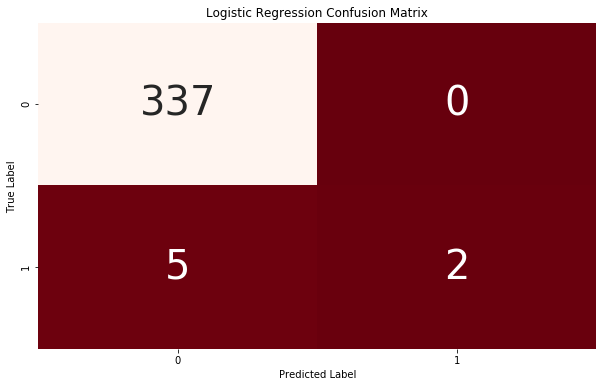

In [113]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

**After applying the classification report to test data set, the accuracy of predicting Cancer Patients get extremely low. Which means that only 2 patients out of 7 are predicted as cancer. So the model misses 5 patients.**

Previous recall:%40

Current recall :%29

**Our model predicts Cancer Patients with %29 accuracy comperatively worse than our previous model which was expected.**

### Logistic Regression with 5-Fold Cross-Validation

In [114]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    scores = []
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 10 times
        clf.fit(x[train], y[train]) # fit
        score = score_func(clf.predict(x[test]), y[test])
        scores.append(score)
        result += score # evaluate score function on held-out data
    return result / nfold, scores # average and the list of the scores

In [115]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

(0.98444698267656572, [0.98058252427184467, 0.970873786407767, 0.99029126213592233, 0.99029126213592233, 0.99019607843137258])


### Logistic Regression with 5-Fold Cross-Validation Test Classification Report

In [116]:
print (classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       337
          1       0.67      0.29      0.40         7

avg / total       0.98      0.98      0.98       344



**After applying of KFold Cross-Validation, no changing on Recall.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

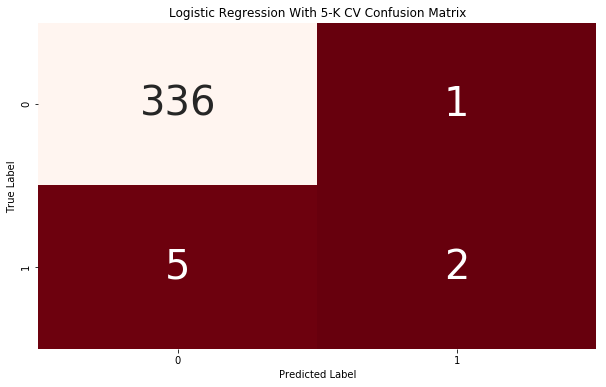

In [117]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression With 5-K CV Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

## Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L1 Penalty

In [118]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                                                                        'penalty': ['l1']}, cv=5)
clf = clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.988372093023


**Accuracy Score is 0.988**

### Best Estimator of Hyper Parameter Optimization with L1 Penalty.

In [119]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**With Lasso, best parameter is 1 and tolerance is 1e-4**

### For each parameter values, accuracy scores and the standard deviations.

In [120]:
results = clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

({'penalty': 'l1', 'C': 0.001}, 0.9786, 0.0038)
({'penalty': 'l1', 'C': 0.01}, 0.9786, 0.0038)
({'penalty': 'l1', 'C': 0.1}, 0.9786, 0.0038)
({'penalty': 'l1', 'C': 1}, 0.9922, 0.0039)
({'penalty': 'l1', 'C': 10}, 0.9903, 0.0062)
({'penalty': 'l1', 'C': 100}, 0.9903, 0.0062)


**Best parameter is C = 10 with 0.9903 accuracy and standard deviation is 0.0062**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L1 Penalty Train Classification Report

In [121]:
print(classification_report(ylr, clf.predict(Xlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       503
          1       0.90      0.82      0.86        11

avg / total       0.99      0.99      0.99       514



**With Lasso Regression, we reached up to 0.82 recall score which means that in the train set our model could predict 9 out of 11 Cancer patients accurately.**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L1 Penalty Test Classification Report

In [122]:
print (classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       337
          1       0.80      0.57      0.67         7

avg / total       0.99      0.99      0.99       344



**With Lasso Regression, in the test set we reached up to 0.57 (almost double) recall score which means that in the test set our model could predict 4 out of 7 Cancer patients accurately, but missed 3 Cancer patients.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

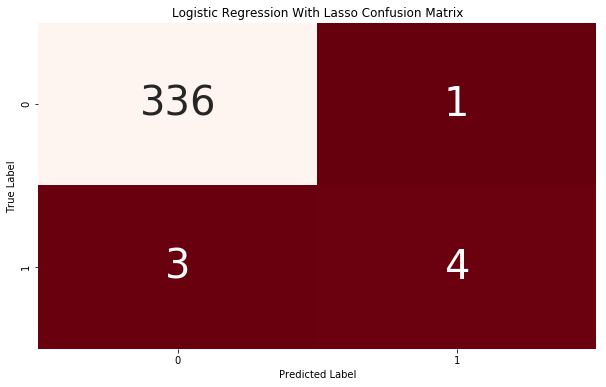

In [123]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression With Lasso Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

## Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L2 Penalty

In [124]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                                                                        'penalty': ['l2']}, cv=5)
clf = clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.994186046512


**After applying the optimization, our accuracy score came to 0.994.**

### Best Estimator of Hyper Parameter Optimization with L2 Penalty.

In [125]:
clf.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**It looks like C=100 is best parameter and tolerance is 1e-4**

### For each parameter values, accuracy scores and the standard deviations.

In [126]:
results = clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

({'penalty': 'l2', 'C': 0.001}, 0.9786, 0.0038)
({'penalty': 'l2', 'C': 0.01}, 0.9786, 0.0038)
({'penalty': 'l2', 'C': 0.1}, 0.9747, 0.0048)
({'penalty': 'l2', 'C': 1}, 0.9844, 0.0047)
({'penalty': 'l2', 'C': 10}, 0.9903, 0.0001)
({'penalty': 'l2', 'C': 100}, 0.9922, 0.0039)


**For Ridge Rgression best parameter is C=100, and standard deviation is 0.0039**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L2 Penalty Train Classification Report

In [127]:
print(classification_report(ylr, clf.predict(Xlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       503
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00       514



**In the train set, model predicted %100 accuracy.**

### Logistic Regression with Grid Seach CV Hyper Parameter Optimization, L2 Penalty Train Classification Report

In [128]:
print (classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       337
          1       1.00      0.71      0.83         7

avg / total       0.99      0.99      0.99       344



**In the test set, the accuracy of the prediction increased upto 0.71 and model predicted 5 out of 7 patients as Cancer accurately.As happened before Ridge regression outperformed to Lasso regression in our model.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

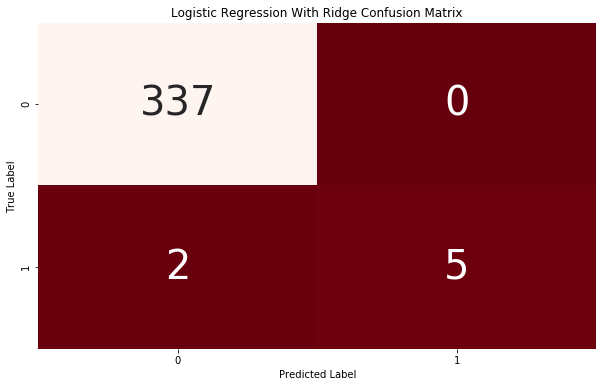

In [129]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression With Ridge Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

### Random Forest Classifier

In [130]:
clf = RandomForestClassifier(n_estimators=400)
clf.fit(Xlr, ylr)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1'], digits = 3))

             precision    recall  f1-score   support

          0      0.991     1.000     0.996       337
          1      1.000     0.571     0.727         7

avg / total      0.991     0.991     0.990       344



**Random Forest Classifier affected model badly and recall decreased down to 0.571 which means 4 out of 7 patients were detected as Cancer and the model missed 3 Cancer patients.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

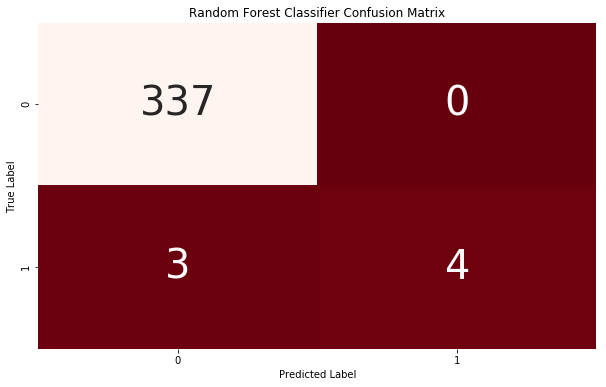

In [131]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

**After applying Random Forest Classifier, our model predicted Non-Cancer Patients with %99.1 accuracy. For Cancer patients the prediction accuracy of the model almost increased double and 4 out of 7 patients predicted correctly as cancer. However since the model produces satisfactory results, we are going to apply SMOTE.**

**Recall increased almost double from %29 to %57.**

## Synthetic Minority Oversampling Technique (SMOTE)

In [132]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xlr, ylr)
print('Resampled dataset shape {}'.format(Counter(y_res)))
print (X_res.shape)
print (y_res.shape)

Resampled dataset shape Counter({0: 503, 1: 503})
(1006L, 63L)
(1006L,)


### SMOTE with Logistic Regression

In [133]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
# Print the accuracy from the training and testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(X_res), y_res)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.999
Test data set accuracy score   : 0.994


### SMOTE with Logistic Regression Test Classification Report

In [134]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1'], digits =3))

             precision    recall  f1-score   support

          0      0.997     0.997     0.997       337
          1      0.857     0.857     0.857         7

avg / total      0.994     0.994     0.994       344



**After applying SMOTE and then fitting our model, recall increased upto %86 with prediction of 6 patients correctly as Cancer.** 

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

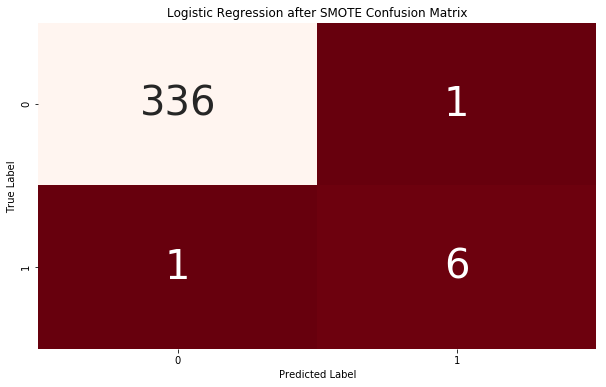

In [135]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Logistic Regression after SMOTE Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

### Applying Random Forest Classifier

In [136]:
clf = RandomForestClassifier(n_estimators=400)
clf.fit(X_res, y_res)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1'], digits = 3))

             precision    recall  f1-score   support

          0      0.997     1.000     0.999       337
          1      1.000     0.857     0.923         7

avg / total      0.997     0.997     0.997       344



**After applying Random Forest Classifier, our model predicted Non-Cancer patients with %100 accuracy, for the Cancer patients prediction accuracy is 6 patients predicted as Cancer accurately out of 7 patients.**

**Confusion Matrix**

Text(0.5,33,'Predicted Label')

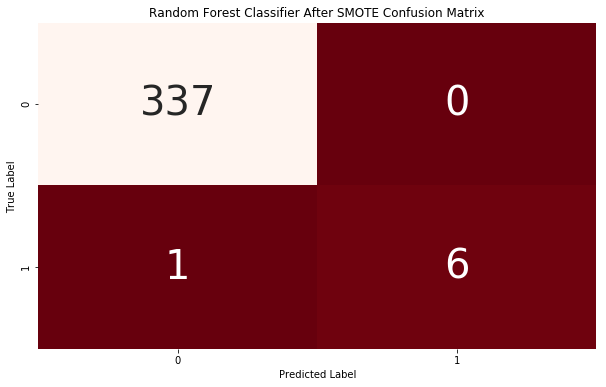

In [137]:
logreg_conf_mat = confusion_matrix(ytestlr,clf.predict(Xtestlr))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = False)
ax.set_title('Random Forest Classifier After SMOTE Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

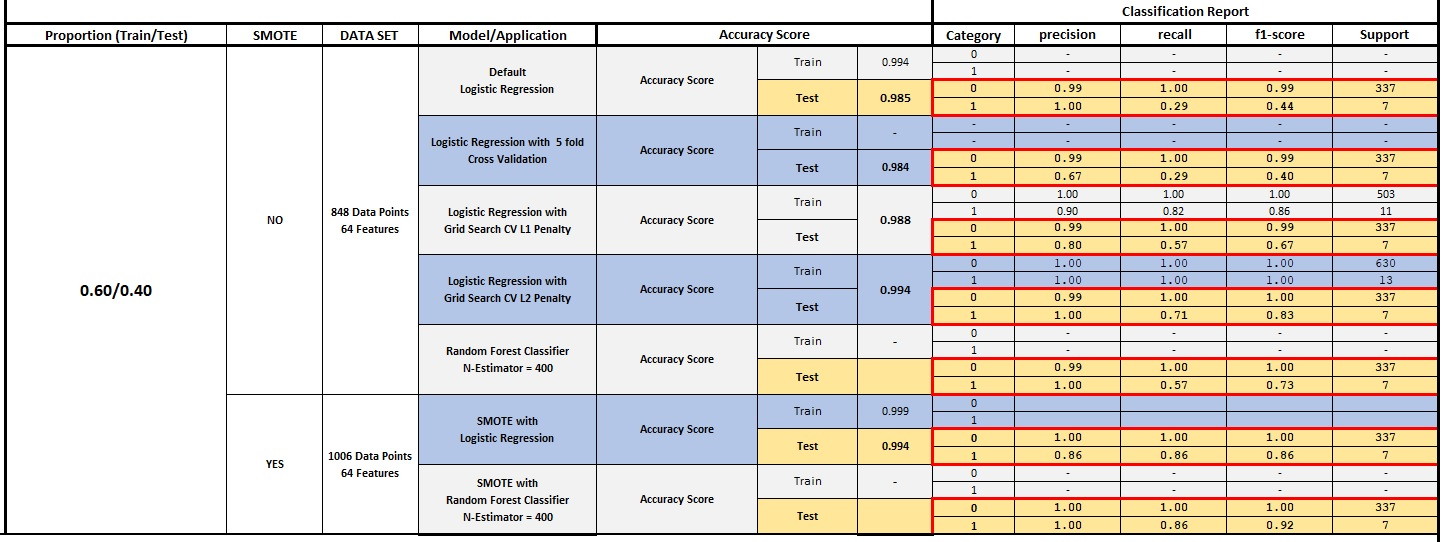

In [138]:
img = 'Report_2.jpg'
Image(filename=img)

**1. After changing the proportion of the train and test size, once we applied Logistic Regression model the accuracy of predicting Cancer patients decreased up to 0.29 in our test model which means 2 out of 7 patients were predicted accurately as Cancer.**

**2. After applying Logistic Regression with 5-Fold Cross Validation with, there was no improvement of the prediction.**

**3. Then we applied Hyper Parameter Tuning to the model with Grid Search CV both L1 and L2 (default) penalties. After applying L1 GridSearch CV regularization, the prediction of Cancer patients increased up to %57 which means 4 out of 7 patients were predicted as Cancer.**

**4. Once we applied L2 GridSearch CV regularization, prediction accuracy of Cancer patients increased upto (0.71) and model predicted 5 out of 7 patients as Cancer.** 

**5. Then we applied Random Forest Classifier to increase the prediction of our model. But recall decreased to 0.57. Our model predicted 4 out of 7 patients as Cancer.** 

**6. In order to increase 1 (positive) samples in Dx:Cancer to get more accurate prediction model, we applied Synthetic Minority Oversampling Technique(SMOTE) to the train set and created 1006 (consisting of equal positive and negative samples) data points. Then we applied Logistic Regression and Random Forest Classifier to increase the accuracy of prediction. This time our model started to predict Cancer patients with %85.7 accuracy and only 1 out of 7 patients was missed by model.**

### Conclusion:

#### After changing the proportion of Train and Test Set, our model's prediction accuracy almost increased upto %6 and 6 out of 7 patients are also predicted as Cancer correctly. If we had more Cancer patient samples in data set, we would have train our model better and get more accurate predictions.To said that we would advise the customer to get more Cancer samples to have better predictions.

### Most Important Features In Our Model

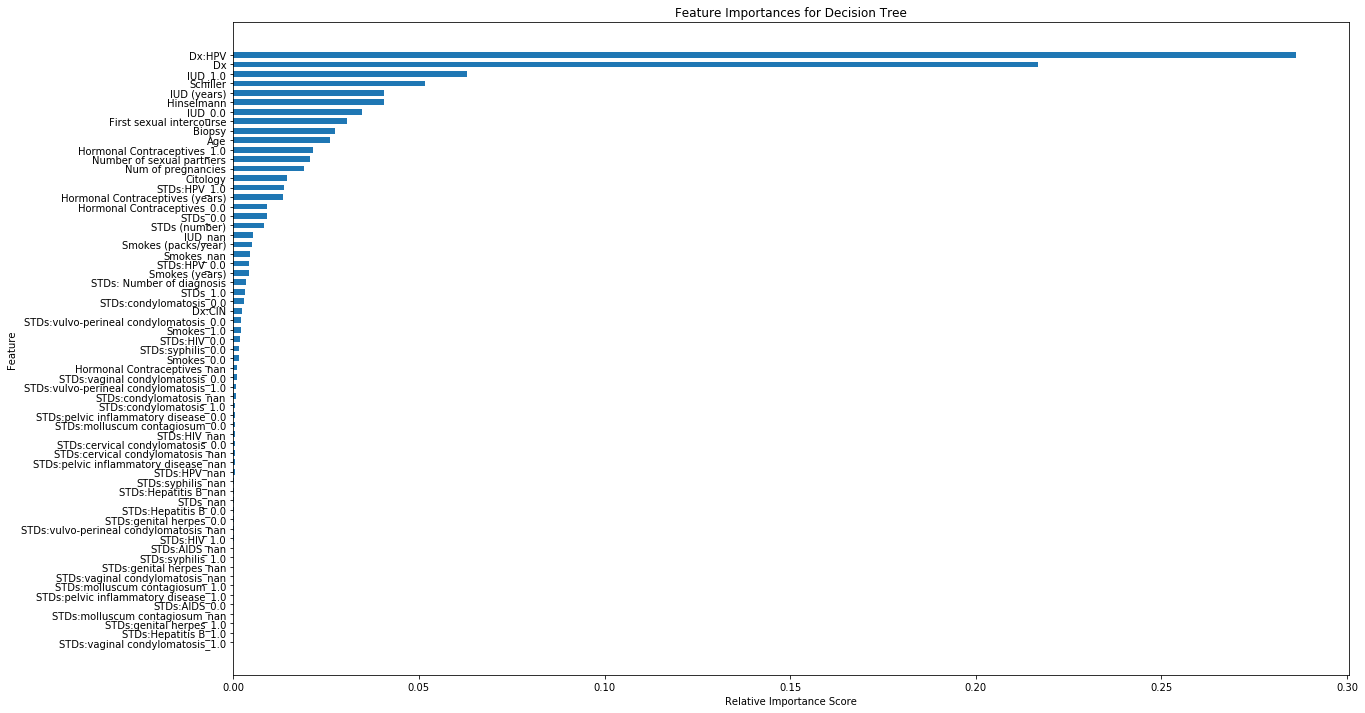

In [139]:
plt.figure(figsize = (20,12))
model_feature_names = df.drop('Dx:Cancer', axis =1).columns
feature_importances = clf.feature_importances_
feature_names, feature_scores = zip(*sorted(zip(model_feature_names, feature_importances), key=lambda x: x[1]))
y_position = list(range(len(feature_names)))
plt.barh(y_position, feature_scores, height=0.6, align='center')
plt.yticks(y_position , feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

### ROC Curve

In [140]:
from sklearn.metrics import roc_curve, auc 
from sklearn.preprocessing import label_binarize

def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be at least 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

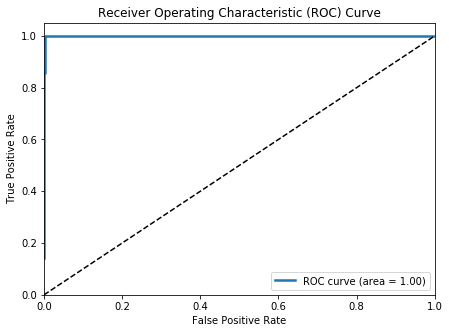

In [141]:
plt.figure(figsize = (7,5))
plot_model_roc_curve(clf, Xtestlr, ytestlr, label_encoder=None, class_names=None)